# Customer Personality Analysis

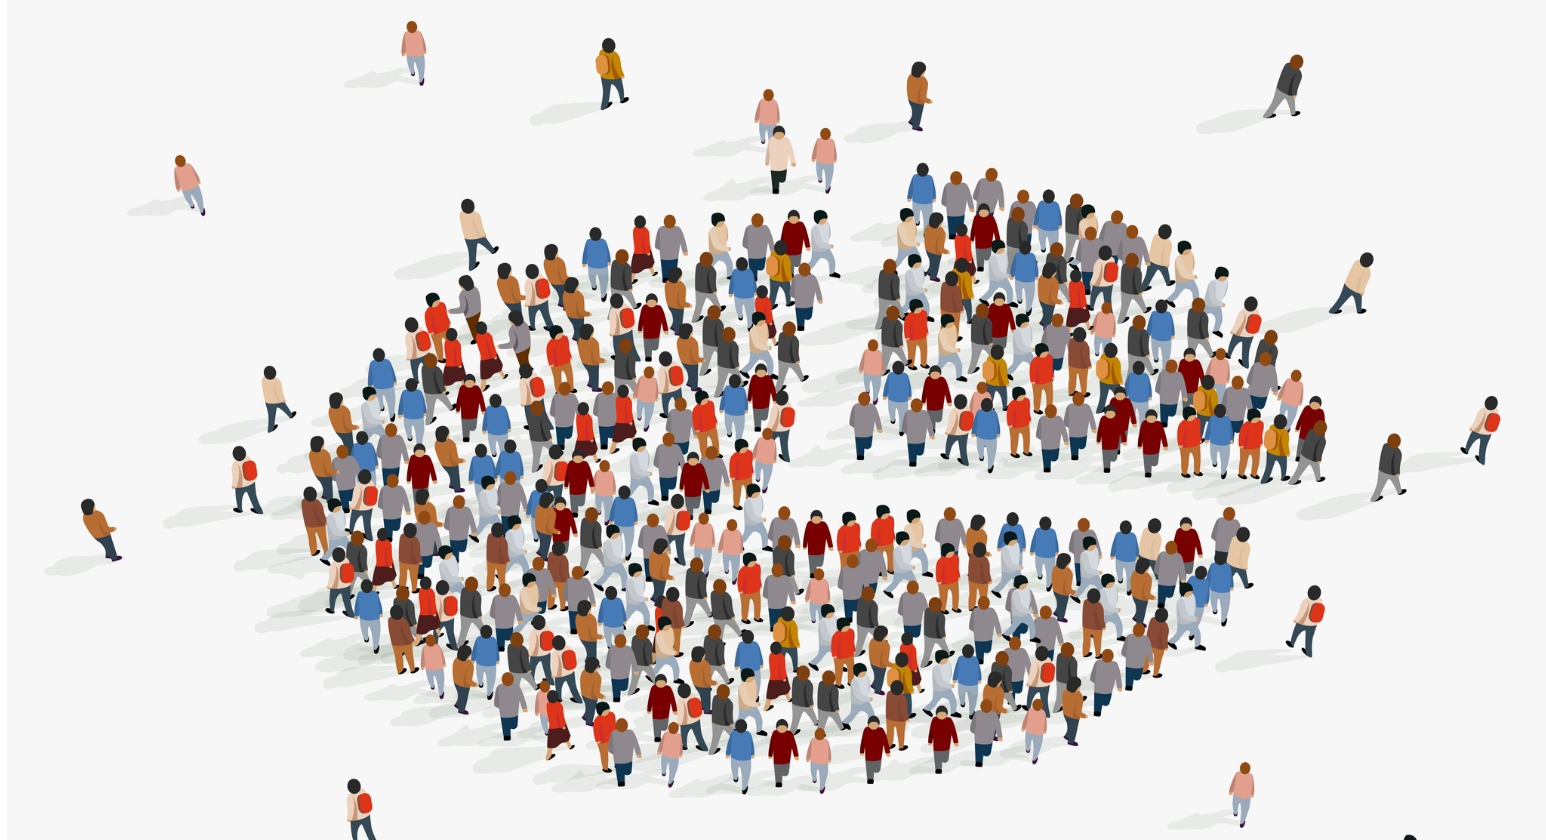
https://brasilescola.uol.com.br/geografia/conceitos-demograficos.htm

## **Descrição do Projeto:**

Este projeto visa realizar uma análise de personalidade de clientes para identificar segmentos distintos com base em dados demográficos, comportamentais e de consumo.  Utilizando técnicas de análise de dados e algoritmos de aprendizado de máquina, pretendemos segmentar a base de clientes de forma a gerar insights acionáveis para estratégias de marketing mais eficazes e personalizadas.  A análise exploratória dos dados permitirá a identificação de padrões e tendências relevantes, auxiliando na definição de perfis de clientes com características comuns.

A partir desses perfis, serão criados segmentos distintos, cada um com características específicas que podem ser utilizadas para direcionar mensagens, ofertas e promoções de forma mais eficiente, otimizando o retorno do investimento em marketing e melhorando a experiência do cliente. O objetivo final é desenvolver um sistema de segmentação que permita a personalização da comunicação de marketing e a otimização do direcionamento das campanhas, levando a um aumento das taxas de conversão e fidelização dos clientes.  Além disso, pretendemos identificar oportunidades de novos produtos ou serviços que atendam às necessidades de cada segmento de forma específica.

A metodologia a ser utilizada envolve diversas etapas: limpeza e pré-processamento dos dados, análise descritiva, exploração de variáveis, aplicação de técnicas de clustering para a formação de segmentos,  análise da significância estatística dos segmentos encontrados e, por fim, a interpretação dos resultados e geração de recomendações para a empresa.  A documentação completa do processo, incluindo metodologia, resultados e conclusões, será entregue ao final do projeto.  A visualização de dados será crucial para comunicar os resultados de forma clara e concisa para tomada de decisões estratégicas.

## **Importância do Projeto:**

Em um mercado cada vez mais competitivo e segmentado, a compreensão profunda do comportamento do cliente é fundamental para o sucesso de qualquer empresa.  A realização de uma análise de personalidade de clientes, como proposta neste projeto, apresenta inúmeras vantagens:

Aumento da Eficiência de Marketing: Ao direcionar as campanhas de marketing para segmentos específicos com necessidades e preferências conhecidas, as empresas podem otimizar o uso de seus recursos, reduzindo desperdícios e aumentando o retorno do investimento (ROI).  Mensagens personalizadas são mais eficazes do que abordagens genéricas, gerando maior engajamento e conversões.

- **Aumento da Eficiência de Marketing: Ao direcionar as campanhas de marketing para segmentos específicos com necessidades e preferências conhecidas, as empresas podem otimizar o uso de seus recursos, reduzindo desperdícios e aumentando o retorno do investimento (ROI).  Mensagens personalizadas são mais eficazes do que abordagens genéricas, gerando maior engajamento e conversões.**
- **Melhora na Experiência do Cliente:  Compreender as características e necessidades de cada segmento permite a criação de experiências personalizadas que melhoram a satisfação do cliente.  Isso inclui o desenvolvimento de produtos e serviços mais adequados às suas necessidades, bem como a criação de uma comunicação mais relevante e personalizada.**
- **Identificação de Oportunidades de Negócio: A análise pode revelar nichos de mercado inexplorados e oportunidades para o desenvolvimento de novos produtos ou serviços que atendam às necessidades de segmentos específicos.**
- **Aumento da Fidelização: Ao entender as preferências e expectativas de seus clientes, as empresas podem construir relacionamentos mais fortes e duradouros, aumentando a fidelidade e a lealdade dos clientes.**
- **Tomada de Decisões Estratégicas: As informações geradas pela análise de personalidade do cliente proporcionam dados concretos para a tomada de decisões mais embasadas e estratégicas, tanto no âmbito de marketing quanto em outras áreas da empresa.**
- **Competitividade: No mercado atual, empresas com uma compreensão profunda do seu público conseguem se diferenciar da concorrência e obter uma vantagem competitiva significativa.**

## **Pilares da Análise:**

**A combinação desses pilares permitirá a construção de um perfil de personalidade mais completo para cada cliente, gerando insights valiosos para a criação de estratégias de marketing mais eficazes e personalizadas. A análise destes pilares poderá ser realizada através de técnicas como análise de cluster, análise fatorial, ou outras técnicas estatísticas adequadas.**

## Importação de bibliotecas

In [1]:
# Importação de bibliotecas essenciais
import pandas as pd  # Manipulação de dados em DataFrames
import numpy as np  # Operações matemáticas e manipulação de arrays

# Bibliotecas de visualização de dados
import seaborn as sns  # Visualizações estatísticas
import matplotlib.pyplot as plt  # Visualizações estáticas
import plotly.express as px  # Visualizações interativas e simplificadas
import plotly.graph_objects as go  # Visualizações interativas avançadas
import plotly.subplots as sp  # Criação de subplots interativos

# Estatísticas
from scipy.stats import chi2_contingency  # Teste de independência Qui-quadrado

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Configuração de localização para formatar números no padrão brasileiro
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')  # Configura a localização para o Brasil
format = lambda num: locale.format_string("%d", num, grouping=True)  # Formata números com separador de milhar

In [2]:
data = 'data\marketing_campaign.csv'
df = pd.read_csv(data, sep="\t", engine='pyarrow', dtype_backend='pyarrow')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\schit\AppData\Local\Temp\ipykernel_27628\1292286943.py:1: SyntaxWarning: invalid escape sequence '\m'
  data = 'data\marketing_campaign.csv'


# Exploratory Data Analysis (EDA)

## Estrutura do dataset

In [3]:
def status_dataframe(dataframe:pd.DataFrame):
    df_columns_name = dataframe.columns.to_list()

    types_list = [str(type(dataframe[col][0])).split("'")[1] for col in dataframe.columns]
    lista_categorias = [dataframe[col].nunique() for col in dataframe.columns]

    elementos_nulos = elementos_nulos = dataframe.isnull().sum()
    elementos_nulos = elementos_nulos.to_list()

    percentagem_dados_nulos = round((dataframe.isnull().sum() / dataframe.shape[0]) * 100)
    percentagem_dados_nulos = percentagem_dados_nulos.to_list()

    print(f'Esse datafame contém {dataframe.shape[1]} colunas e {dataframe.shape[0]} linhas')

    dados_status = pd.DataFrame({'Nome': df_columns_name, 
                            'Tipo': types_list, 
                            'qnt_categorias': lista_categorias,
                            'Dados nulos' : elementos_nulos,
                            'Dados nulos %' : percentagem_dados_nulos})
    return dados_status

display(status_dataframe(df))
display(df.head())

Esse datafame contém 29 colunas e 2240 linhas


Nome Tipo  qnt_categorias  Dados nulos  Dados nulos %
0                    ID  int            2240            0            0.0
1            Year_Birth  int              59            0            0.0
2             Education  str               5            0            0.0
3        Marital_Status  str               8            0            0.0
4                Income  int            1974           24            1.0
5               Kidhome  int               3            0            0.0
6              Teenhome  int               3            0            0.0
7           Dt_Customer  str             663            0            0.0
8               Recency  int             100            0            0.0
9              MntWines  int             776            0            0.0
10            MntFruits  int             158            0            0.0
11      MntMeatProducts  int             558            0            0.0
12      MntFishProducts  int             182            0            0.0
13     MntSweetProducts  int             177            0            0.0
14         MntGoldProds  int             213            0            0.0
15    NumDealsPurchases  int              15            0            0.0
16      NumWebPurchases  int              15            0            0.0
17  NumCatalogPurchases  int              14            0            0.0
18    NumStorePurchases  int              14            0            0.0
19    NumWebVisitsMonth  int              16            0            0.0
20         AcceptedCmp3  int               2            0            0.0
21         AcceptedCmp4  int               2            0            0.0
22         AcceptedCmp5  int               2            0            0.0
23         AcceptedCmp1  int               2            0            0.0
24         AcceptedCmp2  int               2            0            0.0
25             Complain  int               2            0            0.0
26        Z_CostContact  int               1            0            0.0
27            Z_Revenue  int               1            0            0.0
28             Response  int               2            0            0.0

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Dados faltantes

In [5]:
df.dropna(inplace=True)
display(status_dataframe(df))

Esse datafame contém 29 colunas e 2216 linhas


Nome Tipo  qnt_categorias  Dados nulos  Dados nulos %
0                    ID  int            2216            0            0.0
1            Year_Birth  int              59            0            0.0
2             Education  str               5            0            0.0
3        Marital_Status  str               8            0            0.0
4                Income  int            1974            0            0.0
5               Kidhome  int               3            0            0.0
6              Teenhome  int               3            0            0.0
7           Dt_Customer  str             662            0            0.0
8               Recency  int             100            0            0.0
9              MntWines  int             776            0            0.0
10            MntFruits  int             158            0            0.0
11      MntMeatProducts  int             554            0            0.0
12      MntFishProducts  int             182            0            0.0
13     MntSweetProducts  int             176            0            0.0
14         MntGoldProds  int             212            0            0.0
15    NumDealsPurchases  int              15            0            0.0
16      NumWebPurchases  int              15            0            0.0
17  NumCatalogPurchases  int              14            0            0.0
18    NumStorePurchases  int              14            0            0.0
19    NumWebVisitsMonth  int              16            0            0.0
20         AcceptedCmp3  int               2            0            0.0
21         AcceptedCmp4  int               2            0            0.0
22         AcceptedCmp5  int               2            0            0.0
23         AcceptedCmp1  int               2            0            0.0
24         AcceptedCmp2  int               2            0            0.0
25             Complain  int               2            0            0.0
26        Z_CostContact  int               1            0            0.0
27            Z_Revenue  int               1            0            0.0
28             Response  int               2            0            0.0

## Engenharia de atributos
Com base nas colunas existentes, podemos criar novas colunas (atributos) para melhorar a qualidade dos dados e aprimorar o modelo de machine learning:

Podemos criar novas colunas para melhorar a análise e o desempenho de modelos de machine learning:

### 1. Idade: 
Age = 2024 - Year_Birth
 (assumindo que os dados são de 2024).

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [7]:
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month
df['Day'] = df['Dt_Customer'].dt.day

In [8]:
df['Age'] = df['Year'].max() - df['Year_Birth']

### 2. TotalMntSpent: 
TotalMntSpent = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds
  (Gastos totais em todos os produtos).


In [9]:
df['TotalMntSpent'] = df.MntWines + df.MntFruits + df.MntMeatProducts + df.MntFishProducts + df.MntSweetProducts + df.MntGoldProds

### 3. TotalPurchases: 
TotalPurchases = NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases
 (Número total de compras).

In [10]:
df['TotalPurchases'] = df.NumDealsPurchases + df.NumWebPurchases + df.NumCatalogPurchases + df.NumStorePurchases

### 4. Children: 
Children = Kidhome + Teenhome
 (Número total de filhos).

In [11]:
df['Children'] = df.Kidhome + df.Teenhome

### 5. Seniority: 
Calcular a antiguidade do cliente em anos a partir da data de registro (Dt[i]Customer). 

In [12]:
df['SeniorityDays'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

### 6. FamilySize: 
FamilySize = Children + (Marital[i]Status != 'Single') (Tamanho da família, considerando que pessoas casadas/juntas tem pelo menos duas pessoas).

In [13]:
df['FamilySize'] = df['Children'] + (df['Marital_Status'] != 'Single').astype(int)

### 7. AvgPurchaseValue:  
AvgPurchaseValue = TotalMntSpent / TotalPurchases (Valor médio de cada compra).  Tratamento para casos onde TotalPurchases é zero deve ser considerado (eg., atribuir um valor padrão).

In [14]:
df['AvgPurchaseValue'] = df['TotalMntSpent'] / df['TotalPurchases']

### 8. IsMarried: 
Uma variável binária (1 ou 0) indicando se o cliente é casado ou não (simplificando Marital_Status)

In [15]:
df['IsMarried'] = (df['Marital_Status'] != 'Single').astype(int)

### 9. AcceptedAnyCampaign: 
Uma variável binária (1 ou 0) indicando se o cliente aceitou qualquer campanha de marketing (AcceptedCmp1
 OR AcceptedCmp2
 OR AcceptedCmp3
 OR AcceptedCmp4
 OR AcceptedCmp5
).

In [16]:
df['AcceptedAnyCampaign'] = (
    (df['AcceptedCmp1'] == 1) |
    (df['AcceptedCmp2'] == 1) |
    (df['AcceptedCmp3'] == 1) |
    (df['AcceptedCmp4'] == 1) |
    (df['AcceptedCmp5'] == 1)
).astype(int)

### 10. WebVsStorePurchases: 
WebVsStorePurchases = NumWebPurchases / NumStorePurchases (razão entre compras online e em loja).  Tratamento para divisões por zero é necessário.

In [17]:
# Evitar divisões por zero
df['WebVsStorePurchases'] = np.where(
    df['NumStorePurchases'] == 0,  # Condição: denominador igual a zero
    0,                             # Valor para casos de divisão por zero
    df['NumWebPurchases'] / df['NumStorePurchases']  # Cálculo normal
)

## Reparando as colunas do data frame
Para cada coluna de nossos conjuntos de dados, transformaremos agora aquelas que são do tipo str para category. Desta forma podemos economizar espaço de memória e ter melhor desempenho na execução do algoritmo



In [18]:
df['ID'] = df['ID'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [19]:
for x in list(df.select_dtypes('number').columns):
    df[x] = df[x].astype('int64')

c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\arrow\array.py:1298: RuntimeWarning: invalid value encountered in cast
  result = result.astype(dtype, copy=False)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   category      
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   category      
 3   Marital_Status       2216 non-null   category      
 4   Income               2216 non-null   int64         
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [21]:
# Listas de colunas por categoria
colunas_pessoas = [
    'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 
    'Kidhome', 'Teenhome', 'Dt_Customer', 'Year', 'Month', 'Day', 'Age',
    'Recency', 'Complain', 'Children', 'FamilySize', 'IsMarried', 'SeniorityDays'
]

colunas_produtos = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'TotalMntSpent', 'TotalPurchases', 'AvgPurchaseValue' 
]

colunas_promocao = [
    'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
    'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedAnyCampaign', 'Response'
]

colunas_local = [
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'WebVsStorePurchases'
]

# Lista completa de todas as colunas
colunas_todas = colunas_pessoas + colunas_produtos + colunas_promocao + colunas_local

# Reordenando o DataFrame conforme as listas
df = df[colunas_todas]

# Exibindo as primeiras linhas do DataFrame reordenado
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Year  Month  Day  Age  Recency  Complain  Children  FamilySize  \
0  2012-09-04  2012      9    4   57       58         0         0           0   
1  2014-03-08  2014      3    8   60       38         0         2           2   
2  2013-08-21  2013      8   21   49       26         0         0           1   
3  2014-02-10  2014      2   10   30       26         0         1           2   
4  2014-01-19  2014      1   19   33       94         0         1           2   

   IsMarried  SeniorityDays  MntWines  MntFruits  MntMeatProducts  \
0          0            663       635         88              546   
1          0            113        11          1                6   
2          1            312       426         49              127   
3          1            139        11          4               20   
4          1            161       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  TotalMntSpent  \
0              172                88            88           1617   
1                2                 1             6             27   
2              111                21            42            776   
3               10                 3             5             53   
4               46                27            15            422   

   TotalPurchases  AvgPurchaseValue  NumDealsPurchases  AcceptedCmp1  \
0              25                64                  3             0   
1               6                 4                  2             0   
2              21                36                  1             0   
3               8                 6                  2             0   
4              19                22                  5             0   

   AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             0             0   
1             0             0             0             0   
2             0             0             0             0   
3             0             0             0             0   
4             0             0             0             0   

   AcceptedAnyCampaign  Response  NumWebPurchases  NumCatalogPurchases  \
0                    0         1                8                   10   
1                    0         0                1                    1   
2                    0         0                8                    2   
3                    0         0                2                    0   
4                    0         0                5                    3   

   NumStorePurchases  NumWebVisitsMonth  WebVsStorePurchases  
0                  4                  7                    2  
1                  2                  5                    0  
2                 10                  4                    0  
3                  4                  6                    0  
4                  6                  5                    0

### **Tabela: Pessoas**
| **Coluna**        | **Descrição**                                                                         |
|-------------------|---------------------------------------------------------------------------------------|
| **ID**            | Identificador exclusivo do cliente.                                                  |
| **Ano_Nascimento**| Ano de nascimento do cliente.                                                        |
| **Educação**      | Nível de educação do cliente.                                                        |
| **Estado civil**  | Estado civil do cliente.                                                             |
| **Renda**         | Renda familiar anual do cliente.                                                     |
| **Kidhome**       | Número de crianças na casa do cliente.                                               |
| **Teenhome**      | Número de adolescentes na casa do cliente.                                           |
| **Dt_Cliente**    | Data de inscrição do cliente na empresa.                                             |
| **Ano**           | Ano da última compra do cliente.                                                     |
| **Mês**           | Mês da última compra do cliente.                                                     |
| **Dia**           | Dia da última compra do cliente.                                                     |
| **Idade**         | Idade do cliente, calculada a partir do ano de nascimento e da data de inscrição.     |
| **Recência**      | Número de dias desde a última compra do cliente.                                     |
| **Reclamação**    | Indica se o cliente reclamou nos últimos 2 anos (1 para sim, 0 para não).            |
| **Filhos**        | Número de filhos do cliente.                                                         |
| **TamanhoFamília**| Tamanho total da família do cliente, incluindo ele mesmo e seus dependentes.          |
| **EstáCasado**    | Indica se o cliente está casado (1 para sim, 0 para não).                            |
| **Senioridade**   | Número de dias desde que o cliente se inscreveu na empresa.                          |

### **Tabela: Produtos**
| **Coluna**          | **Descrição**                                                          |
|---------------------|----------------------------------------------------------------------|
| **MntWines**         | Valor gasto em vinho nos últimos 2 anos.                             |
| **MntFruits**        | Valor gasto em frutas nos últimos 2 anos.                            |
| **MntMeatProducts**  | Valor gasto em carne nos últimos 2 anos.                             |
| **MntFishProducts**  | Valor gasto em peixe nos últimos 2 anos.                             |
| **MntSweetProducts** | Valor gasto em doces nos últimos 2 anos.                             |
| **MntGoldProds**     | Valor gasto em ouro nos últimos 2 anos.                              |
| **TotalMntSpent**    | Total gasto em todos os produtos nos últimos 2 anos.                 |
| **TotalCompras**     | Total de compras feitas nos últimos 2 anos.                          |
| **ValorMédiaCompra** | Valor médio das compras feitas nos últimos 2 anos.                   |

### **Tabela: Promoção**
| **Coluna**            | **Descrição**                                                                  |
|-----------------------|-------------------------------------------------------------------------------|
| **NumDealsPurchases** | Número de compras feitas com desconto.                                       |
| **AcceptedCmp1**      | Indica se o cliente aceitou a oferta na 1ª campanha (1 para sim, 0 para não). |
| **AcceptedCmp2**      | Indica se o cliente aceitou a oferta na 2ª campanha (1 para sim, 0 para não). |
| **AcceptedCmp3**      | Indica se o cliente aceitou a oferta na 3ª campanha (1 para sim, 0 para não). |
| **AcceptedCmp4**      | Indica se o cliente aceitou a oferta na 4ª campanha (1 para sim, 0 para não). |
| **AcceptedCmp5**      | Indica se o cliente aceitou a oferta na 5ª campanha (1 para sim, 0 para não). |
| **Resposta**          | Indica se o cliente aceitou a oferta na última campanha (1 para sim, 0 para não).|

### **Tabela: Local**
| **Coluna**             | **Descrição**                                                   |
|------------------------|---------------------------------------------------------------|
| **NumWebPurchases**     | Número de compras feitas pelo site da empresa.               |
| **NumCatalogPurchases** | Número de compras feitas usando um catálogo.                 |
| **NumStorePurchases**   | Número de compras feitas diretamente em lojas.               |
| **NumWebVisitsMonth**   | Número de visitas ao site da empresa no último mês.          |
| **WebVsStorePurchases** | Relação entre compras feitas no site e em lojas físicas.     |

## Remoção de Outliers
Boxplot para visualizar a distribuição de cada variável numérica e identificar outliers

In [22]:
def boxplot_independentes(df, colunas_numericas):
    # Criação de uma figura com subgráficos
    fig = sp.make_subplots(rows=1, cols=len(colunas_numericas), subplot_titles=colunas_numericas)

    for i, col in enumerate(colunas_numericas):
        # Adiciona um boxplot para cada coluna
        fig.add_trace(
            go.Box(y=df[col], name=col),
            row=1,
            col=i + 1
        )

    # Layout geral do gráfico
    fig.update_layout(
        title="Boxplot das Variáveis Numéricas",
        showlegend=False,  # Desativa a legenda (opcional)
        paper_bgcolor='white',  # Fundo branco
        plot_bgcolor='white',   # Fundo do gráfico
        height=500,
        width=300 * len(colunas_numericas),  # Largura ajustada com base no número de gráficos
    )

    # Mostra o gráfico
    fig.show()

# Seleciona as colunas numéricas
numericas = list(df.select_dtypes('number').columns)

# Gera os gráficos
boxplot_independentes(df, numericas)

In [23]:
df.drop(df[df['Year_Birth'] < 1940].index, inplace=True)
df.drop(df[df['Income'] >= 200000].index, inplace=True)
df.drop(df[df['Age'] > 90].index, inplace=True)
df.drop(df[df['MntMeatProducts'] > 1000].index, inplace=True)
df.drop(df[df['MntSweetProducts'] > 200].index, inplace=True)
df.drop(df[df['WebVsStorePurchases'] > 10].index, inplace=True)

In [24]:
# Gera os gráficos
boxplot_independentes(df, numericas)

In [25]:
for x in list(df.select_dtypes('category').columns):
    print(f'\n{df[x].value_counts()}')


ID
0       1
7366    1
7326    1
7327    1
7342    1
       ..
5376    0
9432    0
1150    0
4931    0
1501    0
Name: count, Length: 2216, dtype: int64

Education
Graduation    1113
PhD            476
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64

Marital_Status
Married     854
Together    570
Single      468
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


## Métricas e correlação

In [26]:
df.drop(columns='ID').select_dtypes('category').describe().transpose()

count unique         top  freq
Education       2206      5  Graduation  1113
Marital_Status  2206      8     Married   854

In [27]:
df.describe().transpose()

count                           mean  \
Year_Birth           2206.0                    1968.909791   
Income               2206.0                    51828.81777   
Kidhome              2206.0                        0.44243   
Teenhome             2206.0                       0.505893   
Dt_Customer            2206  2013-07-10 05:41:23.771532288   
Year                 2206.0                    2013.027652   
Month                2206.0                       6.466455   
Day                  2206.0                      15.658205   
Age                  2206.0                      45.090209   
Recency              2206.0                      49.028105   
Complain             2206.0                       0.009066   
Children             2206.0                       0.948323   
FamilySize           2206.0                       1.736174   
IsMarried            2206.0                       0.787851   
SeniorityDays        2206.0                     353.762919   
MntWines             2206.0                     306.043518   
MntFruits            2206.0                      26.389846   
MntMeatProducts      2206.0                     164.451496   
MntFishProducts      2206.0                      37.738894   
MntSweetProducts     2206.0                       26.99728   
MntGoldProds         2206.0                      43.908885   
TotalMntSpent        2206.0                     605.529918   
TotalPurchases       2206.0                      14.839529   
AvgPurchaseValue     2206.0           -16724156005176354.0   
NumDealsPurchases    2206.0                       2.310517   
AcceptedCmp1         2206.0                        0.06437   
AcceptedCmp2         2206.0                       0.013599   
AcceptedCmp3         2206.0                       0.073889   
AcceptedCmp4         2206.0                       0.074343   
AcceptedCmp5         2206.0                       0.072983   
AcceptedAnyCampaign  2206.0                       0.207616   
Response             2206.0                       0.150952   
NumWebPurchases      2206.0                       4.076609   
NumCatalogPurchases  2206.0                       2.631006   
NumStorePurchases    2206.0                       5.821396   
NumWebVisitsMonth    2206.0                       5.334542   
WebVsStorePurchases  2206.0                        0.31777   

                                       min                  25%  \
Year_Birth                          1940.0               1959.0   
Income                              1730.0              35265.0   
Kidhome                                0.0                  0.0   
Teenhome                               0.0                  0.0   
Dt_Customer            2012-07-30 00:00:00  2013-01-16 00:00:00   
Year                                2012.0               2013.0   
Month                                  1.0                  3.0   
Day                                    1.0                  8.0   
Age                                   18.0                 37.0   
Recency                                0.0                 24.0   
Complain                               0.0                  0.0   
Children                               0.0                  0.0   
FamilySize                             0.0                  1.0   
IsMarried                              0.0                  1.0   
SeniorityDays                          0.0                180.0   
MntWines                               0.0                 24.0   
MntFruits                              0.0                  2.0   
MntMeatProducts                        0.0                 16.0   
MntFishProducts                        0.0                  3.0   
MntSweetProducts                       0.0                  1.0   
MntGoldProds                           0.0                  9.0   
TotalMntSpent                          5.0                 69.0   
TotalPurchases                         0.0                  8.0   
AvgPurchaseValue    -9223372036854775808.0               

## Correlação de Pearson

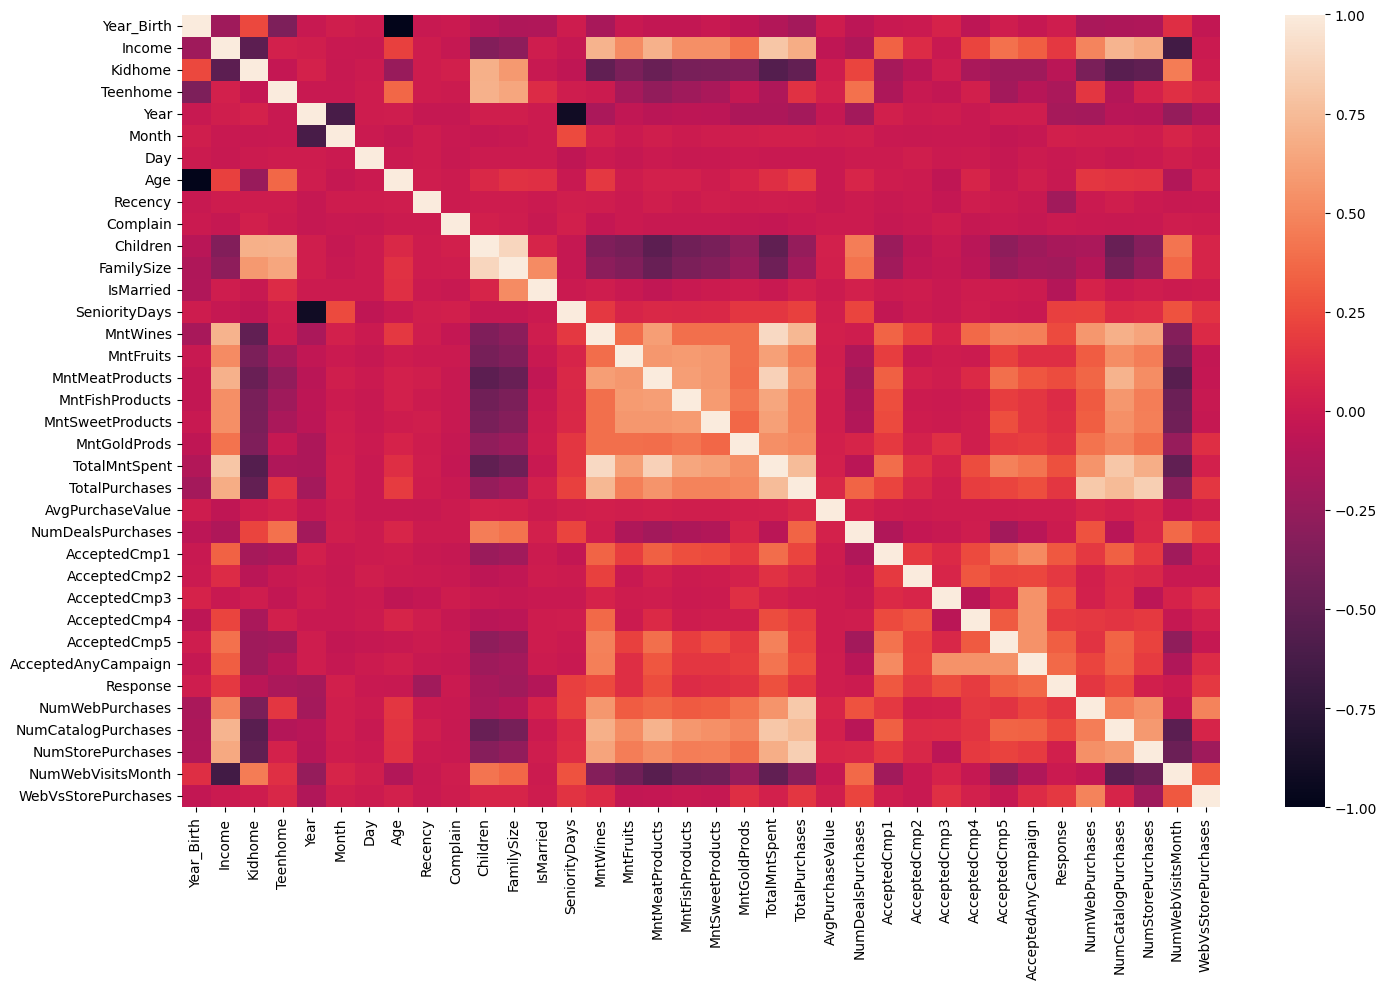

In [28]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(df.select_dtypes('number').corr(), annot=False)
plt.show()

## Coeficiente de Cramer

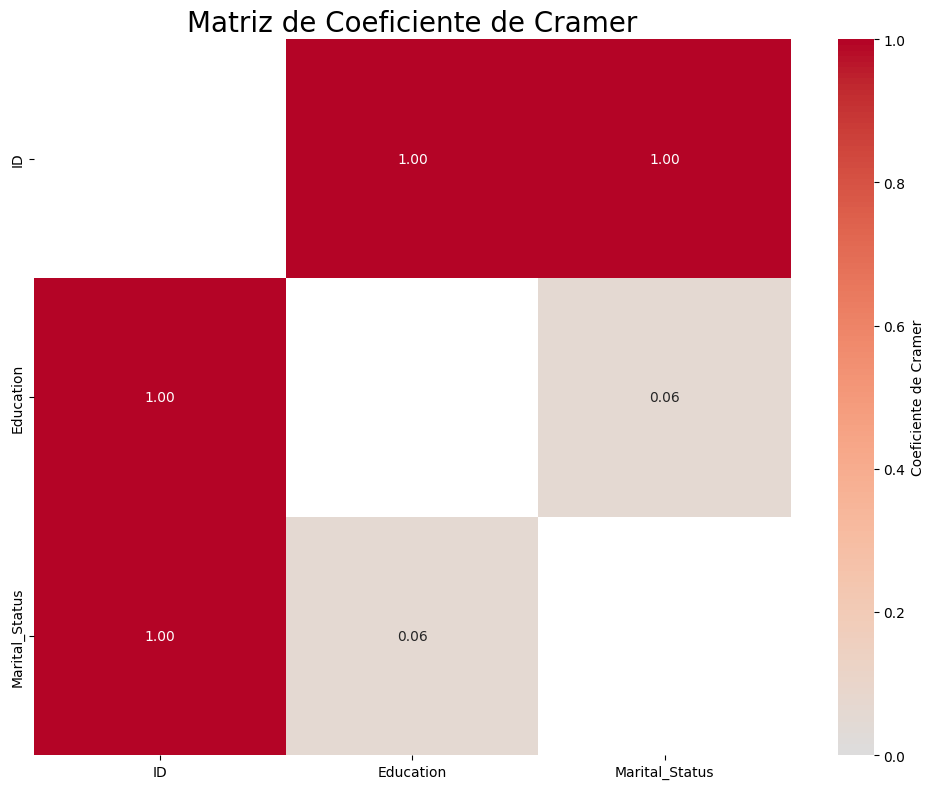

In [29]:
# Função para calcular o coeficiente de Cramer
def cramer_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

# Calcular o coeficiente de Cramer para todas as combinações de variáveis categóricas
categorical_columns = df.select_dtypes('category').columns

# Criar uma matriz de coeficientes
cramer_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        if i != j:
            var1 = categorical_columns[i]
            var2 = categorical_columns[j]
            cramer_matrix.iloc[i, j] = cramer_v(df[var1], df[var2])
        else:
            cramer_matrix.iloc[i, j] = np.nan  # Diagonal principal

# Converter os valores para float
cramer_matrix = cramer_matrix.astype(float)

# Plotar a matriz de correlação de Cramer
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', center=0, vmin=0, vmax=1, fmt='.2f', 
            cbar_kws={'label': 'Coeficiente de Cramer'})
plt.title('Matriz de Coeficiente de Cramer')
plt.show()

## Histogramas

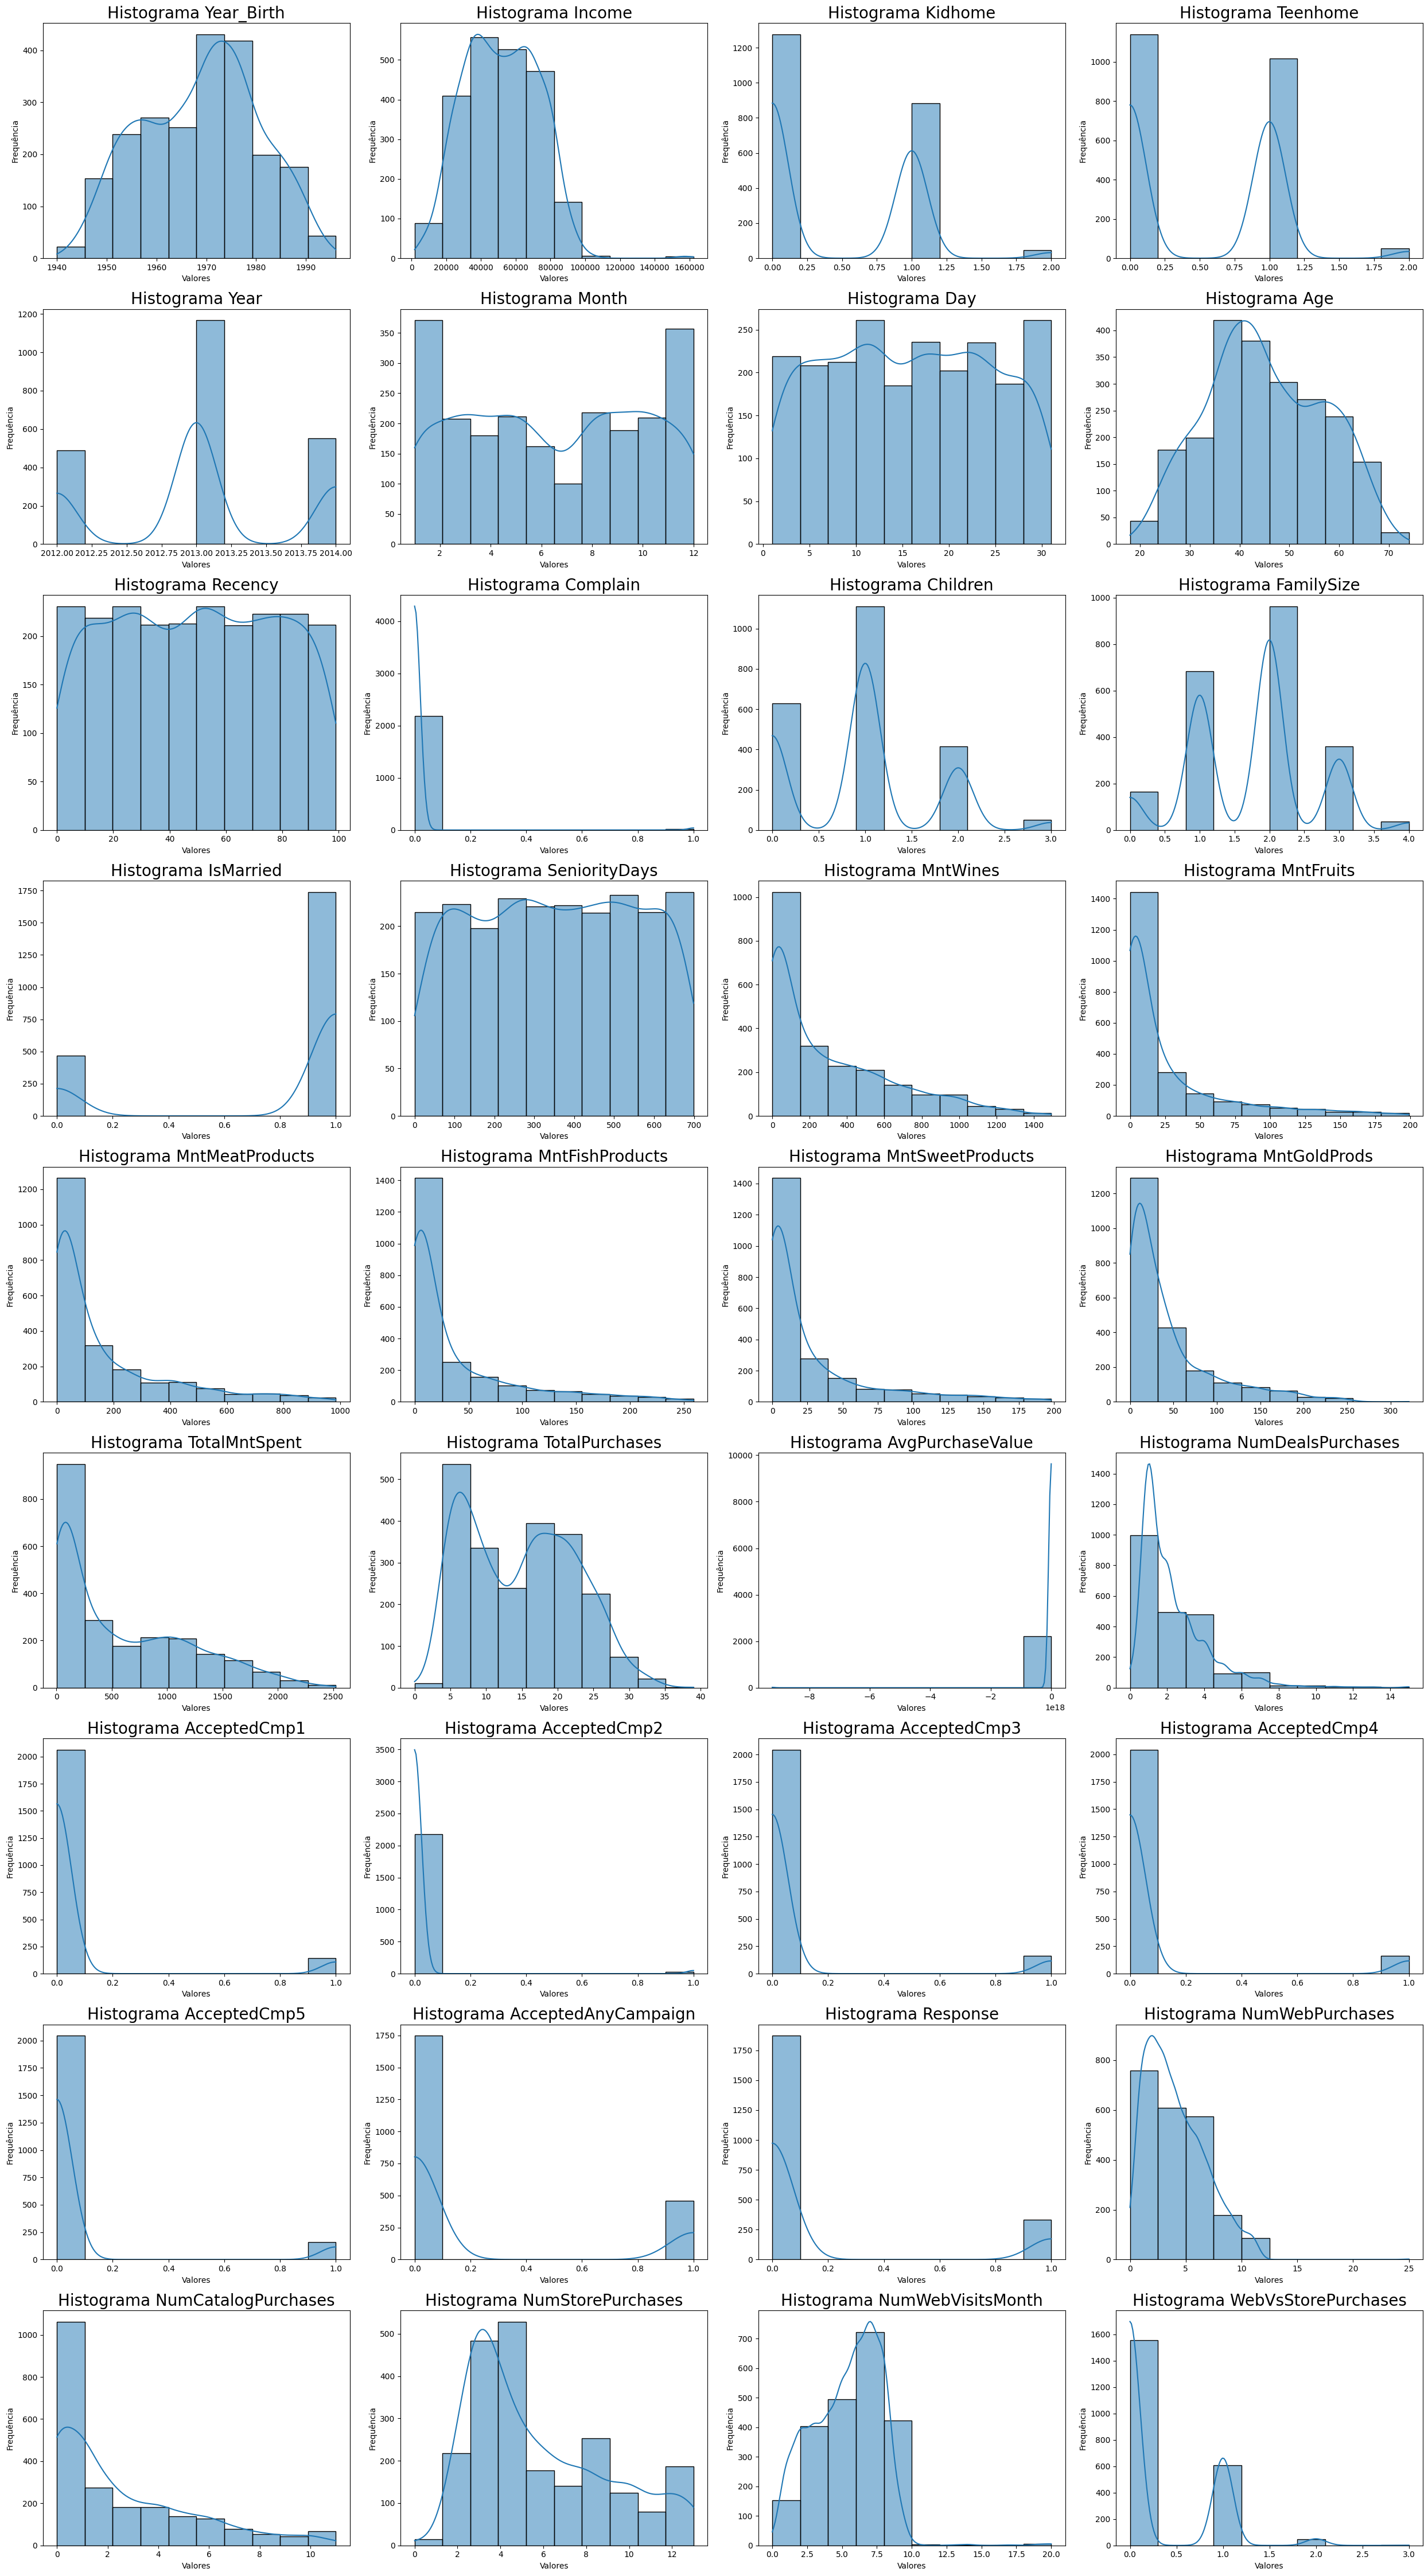

In [30]:
def plot_histograms(df, columns, num_cols=4):
    num_rows = -(-len(columns) // num_cols)  # arredonda para cima

    # Criando a figura e os subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))
    axes = axes.flatten()  # Achata a matriz de eixos para facilitar a iteração

    # Função para plotar o histograma em um subplot específico
    def histplot(ax, col):
        sns.histplot(df[col], bins=10, kde=True, ax=ax)
        ax.set_title(f'Histograma {col}')
        ax.set_xlabel('Valores')
        ax.set_ylabel('Frequência')

    # Iterando sobre as colunas especificadas e os eixos
    for i, col in enumerate(columns):
        histplot(axes[i], col)

    # Removendo subplots vazios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustando o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

# Especificando as colunas a serem plotadas
columns = df.select_dtypes('number').columns

# Chamando a função para plotar os histogramas
plot_histograms(df, columns)

In [62]:
from dateutil.relativedelta import relativedelta

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

inicio = df['Dt_Customer'].min() - relativedelta(years=2)
fim = df['Dt_Customer'].max()

inicio_str = f"{inicio.day}/{inicio.month}/{inicio.year}"
fim_str = f"{fim.day}/{fim.month}/{fim.year}"

duration = (fim - inicio).days

quantidade_clientes = df.shape[0]
faturamento_total = df['TotalMntSpent'].sum()

print(f"Período de análise: {inicio_str} até {fim_str}. {duration} dias")
print(f"Quantidade de clientes: {quantidade_clientes:,}")
print(f"Faturamento total de ${faturamento_total:,.2f} de 2010 até 2014. (4 anos)")

Período de análise: 30/7/2010 até 29/6/2014. 1430 dias
Quantidade de clientes: 2,206
Faturamento total de $1,335,799.00 de 2010 até 2014. (4 anos)


In [31]:
df.to_csv('data/df_descriptive_analysis.csv', index=False)

<img src="https://media.licdn.com/dms/image/v2/D4D03AQGKyH2VYxJFNw/profile-displayphoto-shrink_200_200/B4DZR3AMiKHkAc-/0/1737163329100?e=1742428800&v=beta&t=g3jnt105dxEQvOyv2XAy6EJjviKfFrw1yH61s28JqYk" alt="capa" width="100">

#### [Enzo Schitini](www.linkedin.com/in/enzoschitini)
#### Data Scientist & Data Analyst • Senior Bubble Developer • SQL • Ux/Ui Design 
[*@ Scituffy Founder*](https://scituffy.bubbleapps.io/version-test/index/home)